# Dependencies

In [1]:
from manim import *

import numpy as np
from PIL import Image

In [2]:
def remove_invisible_chars(mobject: SVGMobject) -> SVGMobject:
    """Function to remove unwanted invisible characters from some mobjects.

    Parameters
    ----------
    mobject
        Any SVGMobject from which we want to remove unwanted invisible characters.

    Returns
    -------
    :class:`~.SVGMobject`
        The SVGMobject without unwanted invisible characters.
    """
    # TODO: Refactor needed
    iscode = False
    if mobject.__class__.__name__ == "Text":
        mobject = mobject[:]
    elif mobject.__class__.__name__ == "Code":
        iscode = True
        code = mobject
        mobject = mobject.code
    mobject_without_dots = VGroup()
    if mobject[0].__class__ == VGroup:
        for i in range(len(mobject)):
            mobject_without_dots.add(VGroup())
            mobject_without_dots[i].add(*(k for k in mobject[i] if k.__class__ != Dot))
    else:
        mobject_without_dots.add(*(k for k in mobject if k.__class__ != Dot))
    if iscode:
        code.code = mobject_without_dots
        return code
    return mobject_without_dots

# Motivation

In [ ]:
%%manim -ql -v WARNING Motivation

class Motivation(Scene):
    def construct(self):
        frame = VGroup(SVGMobject("phone.svg")[1:]).scale(4).shift(0.5*DOWN)
        self.play(FadeIn(frame))
        self.wait(2)

        title = Title("Can I build something similar?")
        self.play(Write(title))
        self.wait(2)
        self.play(FadeOut(title, frame))

        title = Title("Convolution")
        self.play(Write(title))
        self.wait(1)

        comment = Tex("180 FPS").scale(1).next_to(title, DOWN).shift(0.5*DOWN)
        self.play(Write(comment))
        self.wait(2)
        self.play(FadeOut(title, comment))

# Convolution

In [ ]:
%%manim -ql -v WARNING Convolution

class Convolution(Scene):
    def convolution_2d(self, image, filter):
        r = filter.shape[0] // 2
        output_img = np.zeros_like(image)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                p_val = 0

                for f_i in range(filter.shape[0]):
                    for f_j in range(filter.shape[1]):
                        in_row = i + (f_i - r)
                        in_col = j + (f_j - r)

                        if (in_row >= 0 and in_row < image.shape[0] and in_col >= 0 and in_col < image.shape[1]):
                            p_val += filter[f_i, f_j] * image[in_row, in_col]
                output_img[i, j] = p_val
        
        return output_img

    def construct(self):
        # ######################################
        # ######### 1D Conv animation ##########
        # ######################################
        # # Title
        # title = Title("1D Convolution")
        # self.play(Write(title))
        # self.wait(1)

        # # 1D Input
        # input_arr = Table(
        #     [["1", "1", "1", "1", "1"]],
        #     include_outer_lines=True
        # ).scale(0.8).shift(0.5*UP)

        # # Filter
        # filter_arr = Table(
        #     [["1", "1", "1"]],
        #     include_outer_lines=True
        # ).scale(0.8).set_color(RED).next_to(input_arr, UP).shift(0.25*UP)
        # filter_arr[0][1].set_color(GRAY)

        # # 1D Output
        # output_arr = Table(
        #     [["2", "3", "3", "3", "2"]],
        #     include_outer_lines=True
        # ).scale(0.8).shift(2*DOWN)

        # self.play(Create(input_arr))
        # self.wait(1)
        # self.play(Create(output_arr[1:]))
        # self.wait(1)
        # self.play(Create(filter_arr))
        # self.wait(1)

        # # 1st output element
        # which_elem = SurroundingRectangle(output_arr.get_cell((1,1)), color=GRAY, buff=0)
        # self.play(Create(which_elem))
        # self.wait(1)

        # shift_distance = input_arr[0][2].get_center() - input_arr[0][0].get_center()
        # self.play(filter_arr.animate.shift(LEFT * shift_distance))
        # self.wait(1)

        # mul_arr = Table(
        #     [["*", "*", "*"]],
        #     include_outer_lines=True
        # ).scale(0.8).set_color(BLUE).next_to(filter_arr[0], DOWN).shift(0.1*UP)

        # self.play(Write(mul_arr[0]))
        # self.wait(1)

        # inter_arr = Table(
        #     [["0", "1", "1"]],
        #     include_outer_lines=True
        # ).scale(0.8).set_color(GREEN).next_to(input_arr[0][0], DOWN)

        # self.play(Write(inter_arr[0]))
        # self.wait(1)

        # add_arr = Table(
        #     [["+", "+",]],
        #     include_outer_lines=True
        # ).scale(0.8).set_color(BLUE).move_to(inter_arr[0])

        # self.play(Write(add_arr[0]))
        # self.wait(1)

        # self.play(ReplacementTransform(VGroup(inter_arr[0], add_arr[0]), output_arr[0][0]), 
        #         FadeOut(mul_arr[0], which_elem))
        # self.wait(1)

        # # 2nd to 5th output element
        # for i in range(1, 5):
        #     which_elem = SurroundingRectangle(output_arr.get_cell((1,i+1)), color=GRAY, buff=0)
        #     self.play(Create(which_elem), run_time=0.5)

        #     shift_distance = input_arr[0][i].get_center() - input_arr[0][i-1].get_center()
        #     self.play(filter_arr.animate.shift(RIGHT * shift_distance), run_time=0.5)

        #     mul_arr = Table(
        #         [["*", "*", "*"]],
        #         include_outer_lines=True
        #     ).scale(0.8).set_color(BLUE).next_to(filter_arr[0], DOWN).shift(0.1*UP)

        #     self.play(Write(mul_arr[0]), run_time=0.5)

        #     if i == 4:
        #         inter_arr = Table(
        #             [["1", "1", "0"]],
        #             include_outer_lines=True
        #         ).scale(0.8).set_color(GREEN).next_to(input_arr[0][i], DOWN)
        #     else:
        #         inter_arr = Table(
        #             [["1", "1", "1"]],
        #             include_outer_lines=True
        #         ).scale(0.8).set_color(GREEN).next_to(input_arr[0][i], DOWN)

        #     self.play(Write(inter_arr[0]), run_time=0.5)

        #     add_arr = Table(
        #         [["+", "+",]],
        #         include_outer_lines=True
        #     ).scale(0.8).set_color(BLUE).move_to(inter_arr[0])

        #     self.play(Write(add_arr[0]), run_time=0.5)

        #     self.play(ReplacementTransform(VGroup(inter_arr[0], add_arr[0]), output_arr[0][i]), FadeOut(mul_arr[0], which_elem), run_time=0.5)
        # self.wait(1)
        # self.play(
        #     *[FadeOut(mob)for mob in self.mobjects]
        # )
        
        # ######################################
        # ######### 2D Conv animation ##########
        # ######################################
        # # Title
        # title = Title("2D Convolution")
        # self.play(Write(title))
        # self.wait(1)

        # # 2D Input
        # input_arr = Table(
        #     [["1", "1", "1", "1", "1"],
        #     ["1", "1", "1", "1", "1"],
        #     ["1", "1", "1", "1", "1"],
        #     ["1", "1", "1", "1", "1"],
        #     ["1", "1", "1", "1", "1"]],
        #     include_outer_lines=True
        # ).scale(0.5).shift(3*LEFT)

        # # Filter
        # filter_arr = Table(
        #     [["1", "1", "1"],
        #     ["1", "1", "1"],
        #     ["1", "1", "1"]],
        #     include_outer_lines=True
        # ).scale(0.5).set_color(RED).move_to(input_arr[0][0])
        # filter_arr[0][4].set_color(GRAY)

        # # 2D Output
        # output_arr = Table(
        #     [["4", "6", "6", "6", "4"],
        #     ["6", "9", "9", "9", "6"],
        #     ["6", "9", "9", "9", "6"],
        #     ["6", "9", "9", "9", "6"],
        #     ["4", "6", "6", "6", "4"]],
        #     include_outer_lines=True
        # ).scale(0.5).shift(3*RIGHT)

        # self.play(Create(input_arr))
        # self.play(Create(output_arr[1:]))
        # self.play(Create(filter_arr))

        # # Computing elements
        # for i in range(len(input_arr[0])):
        #     if i == 0:
        #         self.play(Write(output_arr[0][i]), run_time=0.5)
        #     else:
        #         self.play(filter_arr.animate.move_to(input_arr[0][i]), run_time=0.5)
        #         self.play(Write(output_arr[0][i]), run_time=0.5)
        # self.wait(1)
        # self.play(
        #     *[FadeOut(mob)for mob in self.mobjects]
        # )

        ######################################
        ######### CPU 2D Conv Apply ##########
        ######################################
        # Display high res image
        image = ImageMobject("8k.jpg").scale(0.7)
        self.play(FadeIn(image))
        self.wait(1)

        # Import low res image
        pixels = np.random.rand(10, 10)
        input_table = Table(np.round(pixels, 2).astype(str), include_outer_lines=True).scale(0.45)
        self.play(FadeOut(image), Create(input_table[1:]), Write(input_table[0]))
        self.wait(1)
        self.play(input_table.animate.scale(0.45).shift(3.5*LEFT))
        self.wait(1)

        # Filter table
        filter_arr = -1*np.ones((3, 3))
        filter_arr[1,1] = 8
        filter_table = Table(filter_arr.astype(str), include_outer_lines=True).scale(0.45).scale(0.45).set_color(RED).move_to(input_table[0][0])
        filter_table[0][4].set_color(GRAY)

        # Output table
        output_table = Table(np.round(self.convolution_2d(pixels, filter_arr), 2).astype(str), include_outer_lines=True).scale(0.45).scale(0.45).shift(3.5*RIGHT)

        self.play(Create(output_table[1:]))
        self.play(Create(filter_table))

        # Computing elements
        for i in range(len(input_table[0])):
            if i == 0:
                self.play(Write(output_table[0][i]), run_time=0.01)
            else:
                self.play(filter_table.animate.move_to(input_table[0][i]), run_time=0.01)
                self.play(Write(output_table[0][i]), run_time=0.01)
        title = Title("Only 16 FPS!")
        self.play(Write(title))
        self.wait(1)
        self.play(FadeOut(input_table, filter_table), output_table.animate.scale(2).move_to(ORIGIN).next_to(title, DOWN))
        image = ImageMobject("8k_filter.png").scale(0.7).move_to(ORIGIN).next_to(title, DOWN)
        self.play(FadeOut(output_table), FadeIn(image))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )

# Parallel Convolution

In [ ]:
%%manim -ql -v WARNING Parallel_Convolution

class Parallel_Convolution(Scene):
    def convolution_2d(self, image, filter):
        r = filter.shape[0] // 2
        output_img = np.zeros_like(image)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                p_val = 0

                for f_i in range(filter.shape[0]):
                    for f_j in range(filter.shape[1]):
                        in_row = i + (f_i - r)
                        in_col = j + (f_j - r)

                        if (in_row >= 0 and in_row < image.shape[0] and in_col >= 0 and in_col < image.shape[1]):
                            p_val += filter[f_i, f_j] * image[in_row, in_col]
                output_img[i, j] = p_val
        
        return output_img

    def get_block(self, n_rows, n_cols):
        table = Table(np.random.randint(0, 9, (n_rows,n_cols)).astype(str),
                    include_outer_lines=True).set_color(RED)
        
        arrows = VGroup()
        for i in range(1, n_rows+1):
            for j in range(1, n_cols+1):
                arrows.add(Arrow(start=ORIGIN, end=1.25*DOWN, color=RED, tip_length=0.2).move_to(table.get_cell((i,j))))
        
        return VGroup(table[1:], arrows)
    def construct(self):
        ######################################
        ##### Parallel 2D Conv animation #####
        ######################################
        # Title
        title = Title("Parallel 2D Convolution")
        self.play(Write(title))

        # 2D Input
        input_arr = Table(
            [["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.5).shift(3*LEFT)

        # Filter
        filter_arr = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.5).set_color(GREEN).move_to(input_arr[0][0])
        filter_arr[0][4].set_color(GRAY)

        # 2D Output
        output_arr = Table(
            [["4", "6", "6", "6", "4"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["4", "6", "6", "6", "4"]],
            include_outer_lines=True
        ).scale(0.5).shift(3*RIGHT)

        self.play(Create(input_arr))
        self.play(Create(output_arr[1:]))
        self.wait(1)

        # Threads
        block = self.get_block(5, 5).scale(0.5).move_to(output_arr.get_cell((3,3)))
        self.play(Create(block[1]))
        self.wait(1)

        # Computing 1 element
        self.play(Create(filter_arr))
        for i in range(len(filter_arr[0])):
            self.play(block[1][0].animate.move_to(filter_arr[0][i]), run_time=0.5)
        self.play(ReplacementTransform(block[1][0], output_arr[0][0]), FadeOut(filter_arr))

        # Computing multiple elements
        filter_arr_1 = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.5).set_color(GREEN).move_to(input_arr[0][1])
        filter_arr_1[0][4].set_color(GRAY)

        filter_arr_2 = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.5).set_color(GREEN).move_to(input_arr[0][20])
        filter_arr_2[0][4].set_color(GRAY)

        filter_arr_3 = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.5).set_color(GREEN).move_to(input_arr[0][24])
        filter_arr_3[0][4].set_color(GRAY)

        self.play(Create(filter_arr_1), Create(filter_arr_2), Create(filter_arr_3))
        for i in range(len(filter_arr_1[0])):
            self.play(block[1][1].animate.move_to(filter_arr_1[0][i]), 
                    block[1][20].animate.move_to(filter_arr_2[0][i]),
                    block[1][24].animate.move_to(filter_arr_3[0][i]), 
                    run_time=0.5)
        self.play(ReplacementTransform(block[1][1], output_arr[0][1]), FadeOut(filter_arr_1),
                ReplacementTransform(block[1][20], output_arr[0][20]), FadeOut(filter_arr_2),
                ReplacementTransform(block[1][24], output_arr[0][24]), FadeOut(filter_arr_3))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )

        ######################################
        ######### GPU 2D Conv Apply ##########
        ######################################
        # Display high res image
        image = ImageMobject("8k.jpg").scale(0.7)
        self.play(FadeIn(image))

        # Import low res image
        pixels = np.random.rand(11, 11)
        input_table = Table(np.round(pixels, 2).astype(str), include_outer_lines=True).scale(0.45)
        self.play(FadeOut(image), Create(input_table[1:]), Write(input_table[0]))
        self.play(input_table.animate.scale(0.45).shift(3.5*LEFT))

        # Filter table
        filter_arr = -1*np.ones((3, 3))
        filter_arr[1,1] = 8

        # Output table
        output_table = Table(np.round(self.convolution_2d(pixels, filter_arr), 2).astype(str), include_outer_lines=True).scale(0.45).scale(0.45).shift(3.5*RIGHT)

        # Threads
        threads = VGroup()
        for i in range(1, 11+1):
            for j in range(1, 11+1):
                threads.add(Dot(color=RED).scale(0.5).move_to(output_table.get_cell((i,j))))

        self.play(Create(output_table[1:]), Create(threads))

        # Generating filters
        filters = VGroup()
        for i in range(1, 12, 3):
            for j in range(1, 12, 3):
                filter_table = Table(filter_arr.astype(str), include_outer_lines=True).scale(0.45).scale(0.45).set_color(GREEN).move_to(input_table.get_cell((i,j)))
                filter_table[0][4].set_color(GRAY)
                filters.add(filter_table)

        self.play(Create(filters))

        # Computing elements
        i = np.arange(1, 12, 3)
        j = np.arange(1, 12, 3)
        
        for i_ in range(1, 4):
            for j_ in range(1, 4):
                self.play(threads[(i[0]-1)*11+(j[0]-1)].animate.move_to(filters[0].get_cell((i_, j_))),
                        threads[(i[0]-1)*11+(j[1]-1)].animate.move_to(filters[1].get_cell((i_, j_))),
                        threads[(i[0]-1)*11+(j[2]-1)].animate.move_to(filters[2].get_cell((i_, j_))),
                        threads[(i[0]-1)*11+(j[3]-1)].animate.move_to(filters[3].get_cell((i_, j_))),
                        threads[(i[1]-1)*11+(j[0]-1)].animate.move_to(filters[4].get_cell((i_, j_))),
                        threads[(i[1]-1)*11+(j[1]-1)].animate.move_to(filters[5].get_cell((i_, j_))),
                        threads[(i[1]-1)*11+(j[2]-1)].animate.move_to(filters[6].get_cell((i_, j_))),
                        threads[(i[1]-1)*11+(j[3]-1)].animate.move_to(filters[7].get_cell((i_, j_))),
                        threads[(i[2]-1)*11+(j[0]-1)].animate.move_to(filters[8].get_cell((i_, j_))),
                        threads[(i[2]-1)*11+(j[1]-1)].animate.move_to(filters[9].get_cell((i_, j_))),
                        threads[(i[2]-1)*11+(j[2]-1)].animate.move_to(filters[10].get_cell((i_, j_))),
                        threads[(i[2]-1)*11+(j[3]-1)].animate.move_to(filters[11].get_cell((i_, j_))),
                        threads[(i[3]-1)*11+(j[0]-1)].animate.move_to(filters[12].get_cell((i_, j_))),
                        threads[(i[3]-1)*11+(j[1]-1)].animate.move_to(filters[13].get_cell((i_, j_))),
                        threads[(i[3]-1)*11+(j[2]-1)].animate.move_to(filters[14].get_cell((i_, j_))),
                        threads[(i[3]-1)*11+(j[3]-1)].animate.move_to(filters[15].get_cell((i_, j_))),
                        run_time=0.5)
        self.play(ReplacementTransform(threads[(i[0]-1)*11+(j[0]-1)], output_table[0][(i[0]-1)*11+(j[0]-1)]),
                ReplacementTransform(threads[(i[0]-1)*11+(j[1]-1)], output_table[0][(i[0]-1)*11+(j[1]-1)]),
                ReplacementTransform(threads[(i[0]-1)*11+(j[2]-1)], output_table[0][(i[0]-1)*11+(j[2]-1)]),
                ReplacementTransform(threads[(i[0]-1)*11+(j[3]-1)], output_table[0][(i[0]-1)*11+(j[3]-1)]),
                ReplacementTransform(threads[(i[1]-1)*11+(j[0]-1)], output_table[0][(i[1]-1)*11+(j[0]-1)]),
                ReplacementTransform(threads[(i[1]-1)*11+(j[1]-1)], output_table[0][(i[1]-1)*11+(j[1]-1)]),
                ReplacementTransform(threads[(i[1]-1)*11+(j[2]-1)], output_table[0][(i[1]-1)*11+(j[2]-1)]),
                ReplacementTransform(threads[(i[1]-1)*11+(j[3]-1)], output_table[0][(i[1]-1)*11+(j[3]-1)]),
                ReplacementTransform(threads[(i[2]-1)*11+(j[0]-1)], output_table[0][(i[2]-1)*11+(j[0]-1)]),
                ReplacementTransform(threads[(i[2]-1)*11+(j[1]-1)], output_table[0][(i[2]-1)*11+(j[1]-1)]),
                ReplacementTransform(threads[(i[2]-1)*11+(j[2]-1)], output_table[0][(i[2]-1)*11+(j[2]-1)]),
                ReplacementTransform(threads[(i[2]-1)*11+(j[3]-1)], output_table[0][(i[2]-1)*11+(j[3]-1)]),
                ReplacementTransform(threads[(i[3]-1)*11+(j[0]-1)], output_table[0][(i[3]-1)*11+(j[0]-1)]),
                ReplacementTransform(threads[(i[3]-1)*11+(j[1]-1)], output_table[0][(i[3]-1)*11+(j[1]-1)]),
                ReplacementTransform(threads[(i[3]-1)*11+(j[2]-1)], output_table[0][(i[3]-1)*11+(j[2]-1)]),
                ReplacementTransform(threads[(i[3]-1)*11+(j[3]-1)], output_table[0][(i[3]-1)*11+(j[3]-1)]))
        
        title = Title("105 FPS!")
        self.play(Write(title))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        image = ImageMobject("prev_video.png").scale(1)
        self.play(FadeIn(image))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )

# Constant Memory & Tiling

In [ ]:
%%manim -ql -v WARNING ConstMemTiled_Convolution

class ConstMemTiled_Convolution(Scene):
    def convolution_2d(self, image, filter):
        r = filter.shape[0] // 2
        output_img = np.zeros_like(image)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                p_val = 0

                for f_i in range(filter.shape[0]):
                    for f_j in range(filter.shape[1]):
                        in_row = i + (f_i - r)
                        in_col = j + (f_j - r)

                        if (in_row >= 0 and in_row < image.shape[0] and in_col >= 0 and in_col < image.shape[1]):
                            p_val += filter[f_i, f_j] * image[in_row, in_col]
                output_img[i, j] = p_val
        
        return output_img

    def get_block(self, n_rows, n_cols):
        table = Table(np.random.randint(0, 9, (n_rows,n_cols)).astype(str),
                    include_outer_lines=True).set_color(RED)
        
        arrows = VGroup()
        for i in range(1, n_rows+1):
            for j in range(1, n_cols+1):
                arrows.add(Arrow(start=ORIGIN, end=1.25*DOWN, color=RED, tip_length=0.2).move_to(table.get_cell((i,j))))
        
        return VGroup(table[1:], arrows)
    
    def construct(self):
        ##################################
        ######### Constant Memory ########
        ##################################
        gpu_case = SVGMobject("gpu.svg").scale(3.75)[:2]
        gpu_case[1].shift(1.6*RIGHT)
        gpu_core = Square(side_length=2, color=WHITE, stroke_width=10, fill_opacity=1).next_to(gpu_case[1], RIGHT)
        gpu_core_text = Tex("Processor").next_to(gpu_core, UP)
        global_mem = Rectangle(height=4.75, width=2.5, color=WHITE, stroke_width=10).next_to(gpu_case[1], LEFT).shift(1.6*LEFT)
        global_mem_text = Tex("Global Memory").next_to(global_mem, RIGHT).shift(2*DOWN)
        const_mem = Rectangle(height=1.5, width=1.4, color=YELLOW, stroke_width=15).next_to(global_mem, RIGHT)
        const_mem_text = Tex("Constant Memory", color=YELLOW).next_to(const_mem, UP).shift(1.25*RIGHT+0.5*UP)

        # 2D Input
        input_arr = Table(
            [["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.2).move_to(global_mem).shift(UP)

        # Filter
        filter_arr = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.2).set_color(GREEN).move_to(input_arr[0][0])
        filter_arr[0][4].set_color(GRAY)
        
        _filter_arr = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.2).set_color(GREEN).move_to(input_arr[0][0])
        filter_arr[0][4].set_color(GRAY)

        # 2D Output
        output_arr = Table(
            [["4", "6", "6", "6", "4"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["4", "6", "6", "6", "4"]],
            include_outer_lines=True
        ).scale(0.2).move_to(global_mem).shift(DOWN)
        
        self.play(Create(gpu_case), Create(global_mem), Create(gpu_core), Write(global_mem_text), Write(gpu_core_text))
        self.wait(1)
        self.play(Create(input_arr), Create(filter_arr), Create(output_arr[1:]))
        self.wait(1)

        # Threads
        threads = VGroup()
        for i in range(1, 5+1):
            for j in range(1, 5+1):
                threads.add(Dot(color=RED).scale(0.5).move_to(output_arr.get_cell((i,j))))
        threads.move_to(gpu_core)
        self.play(Create(threads))
        self.wait(1)

        # Global Memory Access
        original_thread_loc = threads[0].get_center()
        for i in range(1, 4):
            for j in range(1, 4):
                self.play(threads[0].animate.move_to(filter_arr.get_cell((i,j))))
                self.play(threads[0].animate.move_to(original_thread_loc))
        self.play(threads[0].animate.move_to(output_arr.get_cell((1,1))))
        self.play(Write(output_arr[0][0]))
        self.play(threads[0].animate.move_to(original_thread_loc))
        self.wait(1)

        # Using constant memory
        self.play(Create(const_mem), Write(const_mem_text), output_arr[0][0].animate.set_opacity(0))
        self.wait(1)
        self.play(filter_arr.animate.move_to(const_mem))
        self.wait(1)
        for i in range(1, 4):
            for j in range(1, 4):
                self.play(threads[0].animate.move_to(filter_arr.get_cell((i,j))), run_time=0.5)
                self.play(threads[0].animate.move_to(original_thread_loc))
                self.play(threads[0].animate.move_to(_filter_arr.get_cell((i,j))))
                self.play(threads[0].animate.move_to(original_thread_loc))
        self.play(threads[0].animate.move_to(output_arr.get_cell((1,1))))
        self.play(output_arr[0][0].animate.set_opacity(1))
        self.play(threads[0].animate.move_to(original_thread_loc))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )

        ##################################
        ########## Shared Memory #########
        ##################################
        # 2D Input
        input_arr = Table(
            [["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.45).to_edge(LEFT).shift(0.5*RIGHT)

        # Filter
        filter_arr = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.45).set_color(GREEN).move_to(input_arr[0][0])
        filter_arr[0][4].set_color(GRAY)

        # 2D Output
        output_arr = Table(
            [["4", "6", "6", "6", "4"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["4", "6", "6", "6", "4"]],
            include_outer_lines=True
        ).scale(0.45).to_edge(RIGHT).shift(0.5*LEFT)

        self.play(Create(input_arr))
        self.play(Create(output_arr[1:]))
        self.wait(1)

        # Output Tile
        out_tile_00 = SurroundingRectangle(VGroup(output_arr.get_cell((1,1)), output_arr.get_cell((1,3)), 
                                            output_arr.get_cell((3,1)), output_arr.get_cell((3,3))), color=ORANGE, buff=0)
        out_tile_01 = SurroundingRectangle(VGroup(output_arr.get_cell((1,1)), output_arr.get_cell((1,3)), 
                                            output_arr.get_cell((3,1)), output_arr.get_cell((3,3))), color=ORANGE, buff=0).move_to(output_arr.get_cell((2,5)))
        out_tile_10 = SurroundingRectangle(VGroup(output_arr.get_cell((1,1)), output_arr.get_cell((1,3)), 
                                            output_arr.get_cell((3,1)), output_arr.get_cell((3,3))), color=ORANGE, buff=0).move_to(output_arr.get_cell((5,2)))
        out_tile_11 = SurroundingRectangle(VGroup(output_arr.get_cell((1,1)), output_arr.get_cell((1,3)), 
                                            output_arr.get_cell((3,1)), output_arr.get_cell((3,3))), color=ORANGE, buff=0).move_to(output_arr.get_cell((5,5)))
        self.play(Create(out_tile_00))
        self.play(Create(out_tile_01))
        self.play(Create(out_tile_10))
        self.play(Create(out_tile_11))
        self.wait(1)
        self.play(FadeOut(out_tile_01, out_tile_10, out_tile_11))
        self.wait(1)


        shift_distance = (input_arr.get_cell((1,2)).get_center() - input_arr.get_cell((1,1)).get_center())[0]
        in_tile = SurroundingRectangle(VGroup(input_arr.get_cell((1,1)), input_arr.get_cell((1,5)), 
                                            input_arr.get_cell((5,1)), input_arr.get_cell((5,5))), 
                                            color=ORANGE, buff=0).shift(shift_distance*(UP+LEFT)+0.1*DOWN)
        self.play(Create(in_tile))
        self.wait(1)

        # Threads
        block_00 = self.get_block(5, 5).scale(0.45).move_to(output_arr.get_cell((2,2)))

        # Shared Mem
        sh_mem = in_tile.copy()
        sh_mem.set_color(RED).set_stroke_width(15).next_to(block_00, LEFT)
        sh_mem_text = Tex(r"Shared Memory", color=RED).next_to(sh_mem, UP)
        self.play(Create(sh_mem), Write(sh_mem_text))
        self.wait(1)
        
        self.play(Create(block_00[1]))
        self.wait(1)

        # Sh_mem content
        sh_mem_arr = Table(
            [["0", "0", "0", "0", "0"],
            ["0", "1", "1", "1", "1"],
            ["0", "1", "1", "1", "1"],
            ["0", "1", "1", "1", "1"],
            ["0", "1", "1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.45).move_to(sh_mem)
        self.play(block_00[1].animate.move_to(in_tile))
        self.play(block_00[1].animate.move_to(sh_mem))
        self.play(Write(sh_mem_arr[0]))
        self.play(block_00[1].animate.move_to(block_00[0]))
        self.wait(1)

        # Computing output
        self.play(FadeOut(sh_mem_text), 
                VGroup(block_00[1][0:5], block_00[1][5], block_00[1][9:11], block_00[1][14:16], block_00[1][19:]).animate.set_opacity(0.1))
        self.wait(1)
        const_mem = Rectangle(height=2, width=2.5, color=YELLOW, stroke_width=15).next_to(sh_mem, DOWN)
        const_mem_text = Tex("Constant Memory", color=YELLOW).next_to(const_mem, LEFT).shift(0.5*DOWN)
        filter_arr.move_to(const_mem)
        self.play(Create(filter_arr), Create(const_mem), Write(const_mem_text))
        threads = block_00[1]
        original_thread_loc = threads[6].get_center()
        for i in range(1, 4):
            for j in range(1, 4):
                self.play(threads[6].animate.move_to(filter_arr.get_cell((i,j))), run_time=0.25)
                self.play(threads[6].animate.move_to(original_thread_loc), run_time=0.25)
                self.play(threads[6].animate.move_to(sh_mem_arr.get_cell((i,j))), run_time=0.25)
                self.play(threads[6].animate.move_to(original_thread_loc), run_time=0.25)
        self.play(threads[6].animate.move_to(output_arr.get_cell((1,1))), run_time=0.25)
        self.play(Write(output_arr[0][0]))
        self.play(threads[6].animate.move_to(original_thread_loc))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )

# Caches and Pinned Memory

In [ ]:
%%manim -ql -v WARNING Caches_PinnedMem

class Caches_PinnedMem(Scene):
    def convolution_2d(self, image, filter):
        r = filter.shape[0] // 2
        output_img = np.zeros_like(image)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                p_val = 0

                for f_i in range(filter.shape[0]):
                    for f_j in range(filter.shape[1]):
                        in_row = i + (f_i - r)
                        in_col = j + (f_j - r)

                        if (in_row >= 0 and in_row < image.shape[0] and in_col >= 0 and in_col < image.shape[1]):
                            p_val += filter[f_i, f_j] * image[in_row, in_col]
                output_img[i, j] = p_val
        
        return output_img

    def get_block(self, n_rows, n_cols):
        table = Table(np.random.randint(0, 9, (n_rows,n_cols)).astype(str),
                    include_outer_lines=True).set_color(RED)
        
        arrows = VGroup()
        for i in range(1, n_rows+1):
            for j in range(1, n_cols+1):
                arrows.add(Arrow(start=ORIGIN, end=1.25*DOWN, color=RED, tip_length=0.2).move_to(table.get_cell((i,j))))
        
        return VGroup(table[1:], arrows)
    
    def construct(self):
        ##################################
        ########### Benchmarking #########
        ##################################
        title = Title("FPS")
        self.play(Write(title))
        self.wait(1)
        
        chart = BarChart(
            values=[105.822, 109.051, 106.488],
            bar_names=["GPU Naive", "GPU Constant Memory", "GPU Constant and Shared Memory"],
            y_range=[0, 150, 50],
            y_length=6,
            x_length=20,
            x_axis_config={"font_size": 36},
        ).scale(0.65).to_edge(DOWN).move_to(ORIGIN)

        # Different parts of BarChart
        x_axis = chart.x_axis
        y_axis = chart.y_axis
        bar_names = chart.x_axis.labels
        bars = chart.bars
        bars[0].color = RED
        bars[1].color = GREEN
        bars[2].color = BLUE
        c_bar_lbls = chart.get_bar_labels(font_size=48)

        self.play(Create(bar_names[0]), Create(bar_names[1]), Create(bar_names[2]))
        self.play(Create(bars[0]))
        self.play(Write(c_bar_lbls[0]))
        self.wait(1)
        self.play(Create(bars[1]))
        self.play(Write(c_bar_lbls[1]))
        self.wait(1)
        self.play(Create(bars[2]))
        self.play(Write(c_bar_lbls[2]))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        ##################################
        ######### Constant Memory ########
        ##################################
        gpu_case = SVGMobject("gpu.svg").scale(3.75)[:2]
        gpu_case[1].shift(1.6*RIGHT)
        gpu_core = Square(side_length=2, color=WHITE, stroke_width=10, fill_opacity=1).next_to(gpu_case[1], RIGHT)
        gpu_core_text = Tex("Processor").next_to(gpu_core, UP)
        global_mem = Rectangle(height=4.75, width=2.5, color=WHITE, stroke_width=10).next_to(gpu_case[1], LEFT).shift(1.6*LEFT)
        global_mem_text = Tex("Global Memory").next_to(global_mem, RIGHT).shift(2*DOWN)
        const_mem = Rectangle(height=1.5, width=1.4, color=YELLOW, stroke_width=15).next_to(global_mem, RIGHT)
        const_mem_text = Tex("Constant Memory", color=YELLOW).next_to(const_mem, UP).shift(1.25*RIGHT+0.5*UP)
        cache = Square(side_length=1).next_to(gpu_core, DOWN)
        cache_text = Tex(r"Cache").scale(0.5).next_to(cache, LEFT)

        # 2D Input
        input_arr = Table(
            [["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.2).move_to(global_mem).shift(UP)

        # Filter
        filter_arr = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.2).set_color(GREEN).move_to(input_arr[0][0])
        filter_arr[0][4].set_color(GRAY)
        
        _filter_arr = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.2).set_color(GREEN).move_to(input_arr[0][0])
        filter_arr[0][4].set_color(GRAY)

        # 2D Output
        output_arr = Table(
            [["4", "6", "6", "6", "4"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["4", "6", "6", "6", "4"]],
            include_outer_lines=True
        ).scale(0.2).move_to(global_mem).shift(DOWN)

        # Threads
        threads = VGroup()
        for i in range(1, 5+1):
            for j in range(1, 5+1):
                threads.add(Dot(color=RED).scale(0.5).move_to(output_arr.get_cell((i,j))))
        threads.move_to(gpu_core)
        self.play(Create(gpu_case), Create(global_mem), Create(gpu_core), Write(global_mem_text), Write(gpu_core_text),
                Create(input_arr), Create(filter_arr), Create(output_arr[1:]), Create(threads), Create(const_mem), Write(const_mem_text))
        self.wait(1)

        # Cache
        self.play(Create(cache), Write(cache_text))
        self.wait(1)

        # Cache data 
        cache_arr = Table(
            [["0", "0", "0"],
            ["0", "1", "1"],
            ["0", "1", "1"]],
            include_outer_lines=True
        ).scale(0.2).set_color(WHITE).move_to(cache)
        orig_loc = VGroup(threads[:3], threads[5:8], threads[10:13]).get_center()
        self.play(threads[0].animate.move_to(filter_arr.get_cell((1,1))))
        self.wait(1)
        self.play(threads[1].animate.move_to(filter_arr.get_cell((1,2))),
                threads[2].animate.move_to(filter_arr.get_cell((1,3))),
                threads[5].animate.move_to(filter_arr.get_cell((2,1))),
                threads[6].animate.move_to(filter_arr.get_cell((2,2))),
                threads[7].animate.move_to(filter_arr.get_cell((2,3))),
                threads[10].animate.move_to(filter_arr.get_cell((3,1))),
                threads[11].animate.move_to(filter_arr.get_cell((3,2))),
                threads[12].animate.move_to(filter_arr.get_cell((3,3))))
        self.wait(1)
        self.play(VGroup(threads[:3], threads[5:8], threads[10:13]).animate.move_to(cache))
        self.wait(1)
        self.play(Write(cache_arr[0]))
        self.wait(1)
        self.play(VGroup(threads[:3], threads[5:8], threads[10:13]).animate.move_to(orig_loc))
        self.wait(1)
        orig_loc = threads[0].get_center()
        self.play(threads[0].animate.move_to(cache_arr.get_cell((1,2))))
        self.wait(1)
        self.play(threads[0].animate.move_to(orig_loc))
        self.wait(1)
        orig_loc = threads[1].get_center()
        self.play(threads[1].animate.move_to(cache_arr.get_cell((1,3))))
        self.wait(1)
        self.play(threads[1].animate.move_to(orig_loc))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        ##################################
        ####### Detailed Benchmark #######
        ##################################
        gpu_case = SVGMobject("gpu.svg").scale(2).shift(3.75*RIGHT+DOWN)
        cpu_core = SVGMobject("cpu.svg").scale(1).shift(3.75*LEFT + 1.75*DOWN)
        RAM = SVGMobject("RAM.svg").scale(1).shift(3.75*LEFT + 2*UP)
        cpu_case = SurroundingRectangle(VGroup(cpu_core, RAM), color=WHITE, stroke_width=15, buff=0.5)
        cpu = VGroup(cpu_core, cpu_case)

        bus_1 = VGroup(
            Line(start=LEFT, end=0.9*RIGHT, color=WHITE, stroke_width=10),
            Line(start=LEFT, end=0.9*RIGHT, color=WHITE, stroke_width=10).shift(0.25*DOWN),
            Line(start=LEFT, end=0.9*RIGHT, color=WHITE, stroke_width=10).shift(0.5*DOWN),
            Line(start=LEFT, end=0.9*RIGHT, color=WHITE, stroke_width=10).shift(0.75*DOWN)
        ).move_to(cpu_case.get_edge_center(RIGHT)).shift(0.9*RIGHT+DOWN)

        self.play(Create(gpu_case))
        self.wait(1)
        self.play(Create(cpu), Create(RAM))
        self.wait(1)
        self.play(Create(bus_1))
        self.wait(1)

        # 2D Input
        input_arr = Table(
            [["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.1).move_to(RAM).shift(LEFT+0.25*UP)

        # Filter
        filter_arr = Table(
            [["1", "1", "1"],
            ["1", "1", "1"],
            ["1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.1).set_color(GREEN).next_to(input_arr, RIGHT)
        filter_arr[0][4].set_color(GRAY)

        # 2D Output
        output_arr = Table(
            [["4", "6", "6", "6", "4"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["6", "9", "9", "9", "6"],
            ["4", "6", "6", "6", "4"]],
            include_outer_lines=True
        ).scale(0.1).move_to(RAM).shift(RIGHT+0.25*UP)

        self.play(Create(input_arr), Create(filter_arr))
        self.wait(1)

        bp = BulletedList("Data from CPU to GPU: 0.00337 seconds",
                        "GPU Computation: 0.00004606 seconds", 
                        "Result from GPU to CPU: 0.00602 seconds").scale(0.7).next_to(gpu_case, UP).shift(0.25*LEFT)
        
        self.play(FadeOut(VGroup(input_arr, filter_arr), target_position=gpu_case))
        self.play(Write(bp[0]))
        self.wait(1)
        self.play(Rotate(gpu_case[1], angle=2*PI, about_point=gpu_case[1].get_center(), rate_func=linear))
        self.play(Rotate(gpu_case[1], angle=2*PI, about_point=gpu_case[1].get_center(), rate_func=linear))
        self.play(Rotate(gpu_case[1], angle=2*PI, about_point=gpu_case[1].get_center(), rate_func=linear))
        self.play(Rotate(gpu_case[1], angle=2*PI, about_point=gpu_case[1].get_center(), rate_func=linear))
        self.play(Write(bp[1]))
        self.wait(1)
        self.play(FadeIn(output_arr, target_position=gpu_case))
        self.play(Write(bp[2]))
        self.wait(1)
        self.play(bp[1].animate.set_opacity(0.5))
        self.wait(1)
        cpu_case_revised = Rectangle(height=cpu_case.height, width=cpu_case.width*1.5, stroke_width=15).move_to(ORIGIN)
        self.play(FadeOut(gpu_case, bp, bus_1, output_arr), ReplacementTransform(cpu_case, cpu_case_revised), VGroup(cpu_core, RAM).animate.shift(3.75*RIGHT))
        self.wait(1)

        ##################################
        ######### Pinned Memory ##########
        ##################################
        ssd = SVGMobject("ssd.svg").next_to(RAM, RIGHT).shift(0.15*RIGHT)
        hdd = SVGMobject("hdd.svg").next_to(RAM, LEFT).shift(0.15*LEFT)

        self.play(Create(ssd), Create(hdd))
        self.wait(1)

        # Input arr
        input_arr = Table(
            [["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"],
            ["1", "1", "1", "1", "1"]],
            include_outer_lines=True
        ).scale(0.1).move_to(RAM).shift(0.25*UP)

        self.play(Create(input_arr))
        self.wait(1)

        # Swapping
        comment = Tex("OS manages RAM...").next_to(cpu_core, UP)
        self.play(input_arr.animate.move_to(ssd).shift(0.1*DOWN))
        self.play(Write(comment))
        self.wait(1)
        comment_1 = Tex("Moving to RAM again will slow things down!").scale(0.75).next_to(cpu_core, UP)
        self.play(input_arr.animate.move_to(RAM).shift(0.25*UP))
        self.play(ReplacementTransform(comment, comment_1))
        self.wait(1)
        comment_2 = Tex("Using Pinned Memory ensures data stays in RAM!").scale(0.75).next_to(cpu_core, UP)
        self.play(ReplacementTransform(comment_1, comment_2))
        self.play(input_arr.animate.shift(1*RIGHT))
        self.play(input_arr.animate.shift(2*LEFT))
        self.play(input_arr.animate.shift(1*RIGHT))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )

        # Final Benchmark 
        title = Title("FPS")
        self.play(Write(title))
        self.wait(1)
        
        chart = BarChart(
            values=[105.822, 184.449],
            bar_names=["GPU", "GPU with Pinned Memory"],
            y_range=[0, 200, 50],
            y_length=6,
            x_length=20,
            x_axis_config={"font_size": 36},
        ).scale(0.75).to_edge(DOWN).move_to(ORIGIN)

        # Different parts of BarChart
        x_axis = chart.x_axis
        y_axis = chart.y_axis
        bar_names = chart.x_axis.labels
        bars = chart.bars
        bars[0].color = RED
        bars[1].color = GREEN
        c_bar_lbls = chart.get_bar_labels(font_size=48)

        self.play(Create(bar_names[0]), Create(bar_names[1]))
        self.play(Create(bars[0]))
        self.play(Write(c_bar_lbls[0]))
        self.wait(1)
        self.play(Create(bars[1]))
        self.play(Write(c_bar_lbls[1]))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

# Conclusion

In [ ]:
%%manim -ql -v WARNING Conclusion

class Conclusion(Scene):
    def construct(self):
        # Benchmark 
        title = Title("FPS")
        self.play(Write(title))
        self.wait(1)
        
        chart = BarChart(
            values=[16.466, 105.822, 109.051, 106.488, 184.449],
            bar_names=["CPU (Naive)", "GPU(Naive)", "Const Mem", "Const+Sh Mem", "Pinned"],
            y_range=[0, 200, 50],
            y_length=6,
            x_length=15,
            x_axis_config={"font_size": 36},
        ).scale(0.75).to_edge(DOWN).move_to(ORIGIN)

        # Different parts of BarChart
        x_axis = chart.x_axis
        y_axis = chart.y_axis
        bar_names = chart.x_axis.labels
        bars = chart.bars
        bars[0].color = RED
        bars[1].color = GREEN
        c_bar_lbls = chart.get_bar_labels(font_size=48)

        self.play(Create(bar_names[0]), Create(bar_names[1]), Create(bar_names[2]), Create(bar_names[3]), Create(bar_names[4]))
        self.play(Create(bars[0]))
        self.play(Write(c_bar_lbls[0]))
        self.wait(1)
        self.play(Create(bars[1]))
        self.play(Write(c_bar_lbls[1]))
        self.wait(1)
        self.play(Create(bars[2]))
        self.play(Write(c_bar_lbls[2]))
        self.wait(1)
        self.play(Create(bars[3]))
        self.play(Write(c_bar_lbls[3]))
        self.wait(1)
        self.play(Create(bars[4]))
        self.play(Write(c_bar_lbls[4]))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(10)

        dialogue = Tex("Let me know what you ", "think",".").scale(1.5)
        dialogue[1].set_color(RED)
        self.play(Write(dialogue))
        self.wait(2)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

# Thumbnail

Manim Community v0.19.0

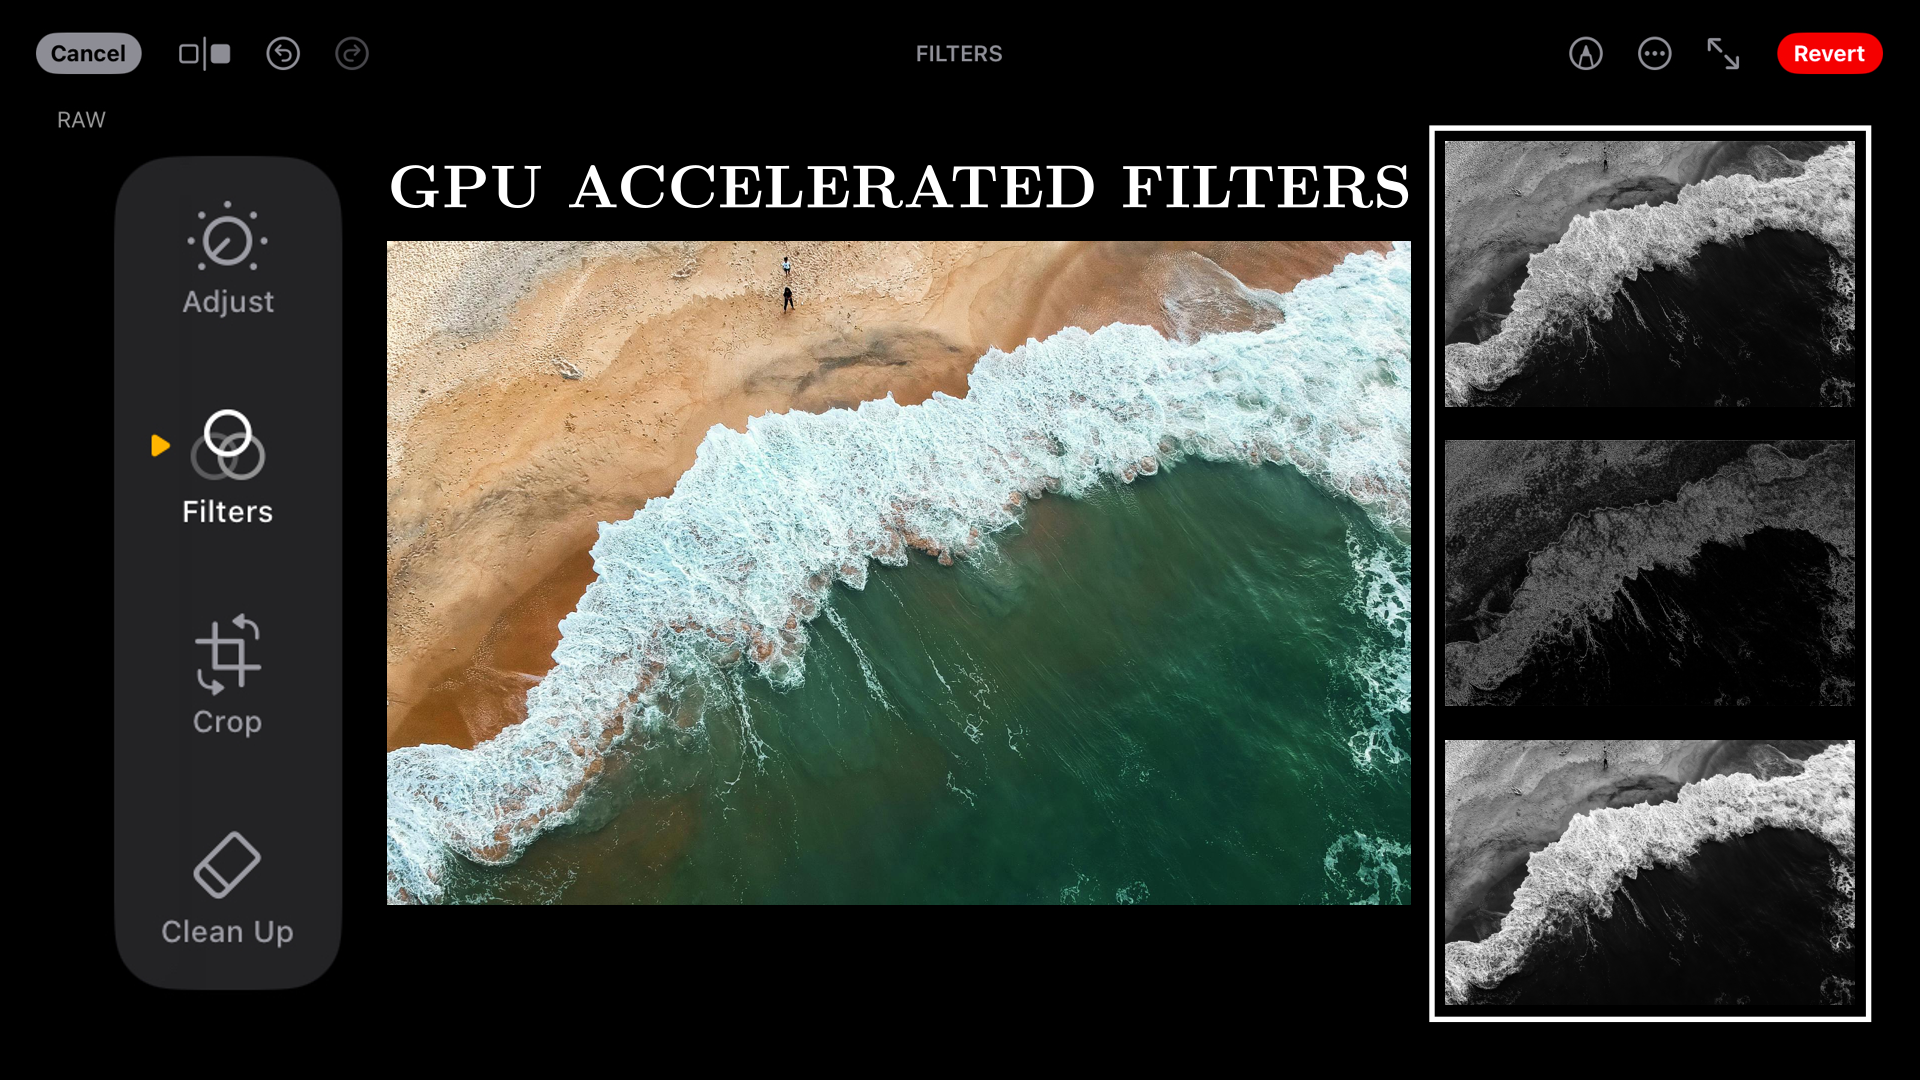

In [54]:
%%manim -qh -v WARNING Thumbnail

class Thumbnail(Scene):
    def construct(self):
        ipad = SVGMobject("ipad.svg")[0].set_color('#C0C0C0').scale(3.5)
        ipad_f_icon = ImageMobject("ipad_filter_icon.jpeg").scale(1.5).move_to(ipad.get_edge_center(LEFT)).to_edge(LEFT).shift(0.25*DOWN+0.25*LEFT)
        ipad_f_top = ImageMobject("ipad_filter_top.jpeg").scale(0.8).move_to(ipad.get_edge_center(UP)).shift(0.15*DOWN)
        self.add(ipad_f_icon, ipad_f_top)
        
        img_orig = ImageMobject("8k_color.jpg").scale(0.5).next_to(ipad_f_icon, RIGHT).shift(0.75*LEFT)
        img_f1 = ImageMobject("f1.png").scale(0.2).next_to(img_orig, RIGHT)
        img_f2 = ImageMobject("f2.png").scale(0.2).next_to(img_f1, DOWN)
        img_f3 = ImageMobject("f5.png").scale(0.2).next_to(img_f1, UP)
        frame = SurroundingRectangle(Group(img_f1, img_f2, img_f3), color=WHITE)
        text = Tex(r"\textbf{GPU ACCELERATED FILTERS}").scale(0.9).next_to(img_orig, UP)

        self.add(img_orig, img_f1, img_f2, img_f3, frame, text)
